In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

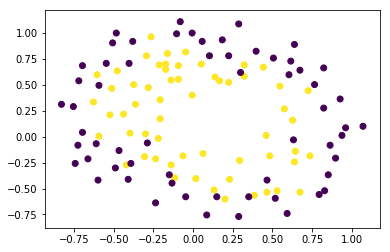

In [7]:
# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data) #分割数据0.2为测试数据，0.8为训练数据

# 创建决策树模型
# max_depth，树的深度
# min_samples_split内部节点再划分所需最小样本数
model = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=4)
# 输入数据建立模型
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model,
                                out_file = None,
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)

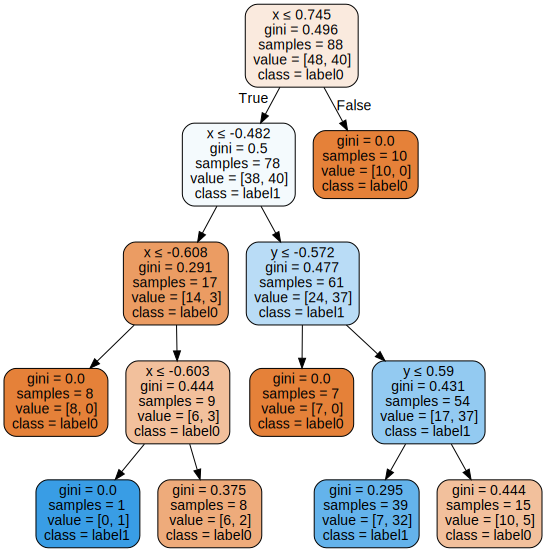

In [24]:
graph

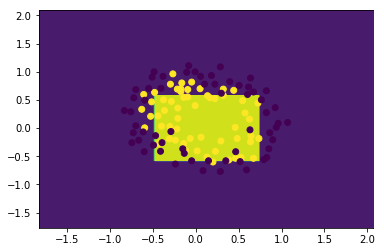

In [25]:
# 获取数据集所在的范围
x_min, x_max = x_data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [26]:
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))

             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85        48
        1.0       0.82      0.82      0.82        40

avg / total       0.84      0.84      0.84        88



In [27]:
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

        0.0       0.92      0.52      0.67        21
        1.0       0.44      0.89      0.59         9

avg / total       0.78      0.63      0.64        30

